In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300

BEST_RUN_PATH = Path("data", "wandb_best_conll.csv")
best_run_type = "CoNLL 2003"
save_path = Path(os.getcwd(), "output_figs", "best_conll_fig.png")

# BEST_RUN_PATH = Path("data", "wandb_best_wnut.csv")
# best_run_type = "WNUT 2017"
# save_path = Path(os.getcwd(), "output_figs", "best_wnut_fig.png")

In [8]:
df = pd.read_csv(BEST_RUN_PATH)
df.set_index('metric', inplace=True)
df = df.drop(["support"])
# df = df.drop(["micro avg", "macro avg",	"weighted avg"], axis=1)
df = df.drop(["macro avg", "weighted avg"], axis=1)
df

,PER,ORG,LOC,MISC,micro avg
metric,,,,,
precision,0.736757,0.534527,0.714470,0.463087,0.639565
recall,0.842919,0.503311,0.663070,0.491453,0.646246
f1-score,0.786271,0.518450,0.687811,0.476849,0.642889


In [9]:
# # Create a figure and axes
# plt.figure(figsize=(8, 6))

# # Create the heatmap
# sns.heatmap(df, annot=True, cmap='magma', fmt='.2f', cbar_kws={'label': 'Value'}, vmin=df.min().min() - 0.1, vmax=df.max().max() + 0.1)

# # Set title and labels
# plt.title('Metrics Heatmap')
# plt.xlabel('Metrics')
# plt.ylabel('Entities')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0, ha="right")

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()

In [10]:
df_transposed = df.T

labels = list(df_transposed.index)
labels = [label.upper().replace(" ", "-") for label in labels]


precision = df_transposed['precision'].values
recall = df_transposed['recall'].values
f1_score = df_transposed['f1-score'].values

data_array = np.array([precision, recall, f1_score])
# data_array

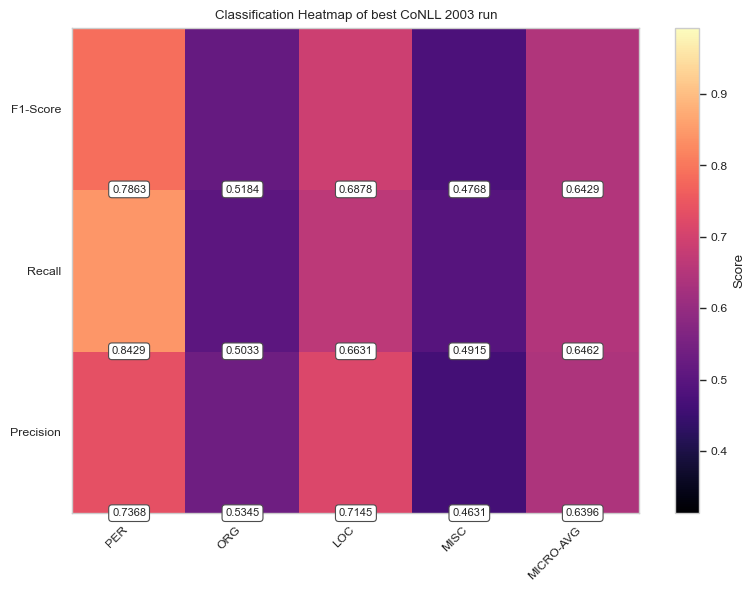

In [11]:
# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
heatmap = ax.pcolor(
    data_array, 
    cmap=sns.color_palette("magma", as_cmap=True),
    vmin = np.min(data_array) - 0.15,
    vmax = np.max(data_array) + 0.15,
)

# Add labels and title
ax.set_xticks(np.arange(len(labels)) + 0.5)
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_yticks(np.arange(3) + 0.5)
ax.set_yticklabels(["Precision", "Recall", "F1-Score"])

ax.set_title(f"Classification Heatmap of best {best_run_type} run")

# Add colorbar
fig.colorbar(heatmap, label="Score")

format_grid_value = lambda x: "{:.4f}".format(x)

# Loop through each cell and set the text with value
for (i, j), z in np.ndenumerate(data_array):
    ax.text(j + 0.5, i, format_grid_value(z), ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

fig.tight_layout()
fig.savefig(save_path, bbox_inches='tight')
fig.canvas.draw()